## Need For Speed

# Text Preprocessing

In [1]:
# Import necessary modules
import pandas as pd
import string
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

# Read CSV into DataFrame
data = pd.read_csv("hasil_review_1846380.csv")

# Define the function to remove punctuations from the text
def remove_punctuation(text):
    punctuation_free = "".join([char for char in text if char not in string.punctuation])
    return punctuation_free

# Apply the remove_punctuation function to the 'REVIEW' column
data['REVIEW'] = data['REVIEW'].apply(remove_punctuation)

# Convert text to lowercase
data['REVIEW'] = data['REVIEW'].str.lower()

# Define the function to remove digits and hyphens from the text
def remove_numbers(text):
    return re.sub(r"[\d-]", '', text)

# Apply the remove_numbers function to the 'REVIEW' column
data['REVIEW'] = data['REVIEW'].apply(remove_numbers)

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Tokenize the text
data['REVIEW'] = data['REVIEW'].apply(word_tokenize)

# Get the list of English stop words
stop_words = set(stopwords.words('english'))

# Define the function to remove stopwords from tokenized text
def remove_stopwords(text):
    return [word for word in text if word not in stop_words]

# Apply the remove_stopwords function to the 'REVIEW' column
data['REVIEW'] = data['REVIEW'].apply(remove_stopwords)

# Define the PorterStemmer object for stemming
porter_stemmer = PorterStemmer()

# Define the function for stemming
def stemming(text):
    return [porter_stemmer.stem(word) for word in text]

# Apply the stemming function to the 'REVIEW' column
data['REVIEW'] = data['REVIEW'].apply(stemming)

# Define the WordNetLemmatizer object for lemmatization
wordnet_lemmatizer = WordNetLemmatizer()

# Define the function for lemmatization
def lemmatizer(text):
    return [wordnet_lemmatizer.lemmatize(word) for word in text]

# Apply the lemmatizer function to the 'REVIEW' column
data['REVIEW_CLEAN'] = data['REVIEW'].apply(lemmatizer)

# Save the cleaned dataset to a new CSV file
data.to_csv('needforspeedheat.csv', index=False)

data.head(20)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Qeme\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Qeme\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Qeme\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,INDEX,AUTHOR,DATE,POSITIVE,REVIEW,REVIEW_CLEAN
0,166126700,76561198398398611,26/05/2024,False,"[vol, best, updat, game, ever, play, properli,...","[vol, best, updat, game, ever, play, properli,..."
1,166125795,76561198057335209,26/05/2024,True,"[game, option, game]","[game, option, game]"
2,166124968,76561198836430285,26/05/2024,False,"[neg, deserv, game, enjoy, fun, play, includ]","[neg, deserv, game, enjoy, fun, play, includ]"
3,166123561,76561198372719179,26/05/2024,True,"[car, awd, eclips, eclips]","[car, awd, eclips, eclips]"
4,166123137,76561198861707042,26/05/2024,True,"[great, game, love, cartoon, style, much]","[great, game, love, cartoon, style, much]"
5,166123105,76561198036277709,26/05/2024,False,"[need, speed, realli, one, worst, worst, game,...","[need, speed, realli, one, worst, worst, game,..."
6,166122984,76561198274441189,26/05/2024,True,"[hate, mayor, decad, broken]","[hate, mayor, decad, broken]"
7,166122195,76561199002417578,26/05/2024,True,[ye],[ye]
8,166121486,76561198015844103,26/05/2024,False,"[remap, control, button, want, massiv, critic,...","[remap, control, button, want, massiv, critic,..."
9,166121009,76561198092566565,26/05/2024,True,"[bom, anim]","[bom, anim]"


In [2]:
data['POSITIVE'] = data['POSITIVE'].replace({True: 'positive', False: 'negative'})
data.head(20)

,INDEX,AUTHOR,DATE,POSITIVE,REVIEW,REVIEW_CLEAN
0,166126700,76561198398398611,26/05/2024,negative,"[vol, best, updat, game, ever, play, properli,...","[vol, best, updat, game, ever, play, properli,..."
1,166125795,76561198057335209,26/05/2024,positive,"[game, option, game]","[game, option, game]"
2,166124968,76561198836430285,26/05/2024,negative,"[neg, deserv, game, enjoy, fun, play, includ]","[neg, deserv, game, enjoy, fun, play, includ]"
3,166123561,76561198372719179,26/05/2024,positive,"[car, awd, eclips, eclips]","[car, awd, eclips, eclips]"
4,166123137,76561198861707042,26/05/2024,positive,"[great, game, love, cartoon, style, much]","[great, game, love, cartoon, style, much]"
5,166123105,76561198036277709,26/05/2024,negative,"[need, speed, realli, one, worst, worst, game,...","[need, speed, realli, one, worst, worst, game,..."
6,166122984,76561198274441189,26/05/2024,positive,"[hate, mayor, decad, broken]","[hate, mayor, decad, broken]"
7,166122195,76561199002417578,26/05/2024,positive,[ye],[ye]
8,166121486,76561198015844103,26/05/2024,negative,"[remap, control, button, want, massiv, critic,...","[remap, control, button, want, massiv, critic,..."
9,166121009,76561198092566565,26/05/2024,positive,"[bom, anim]","[bom, anim]"


# Modeling & Performance Evaluation

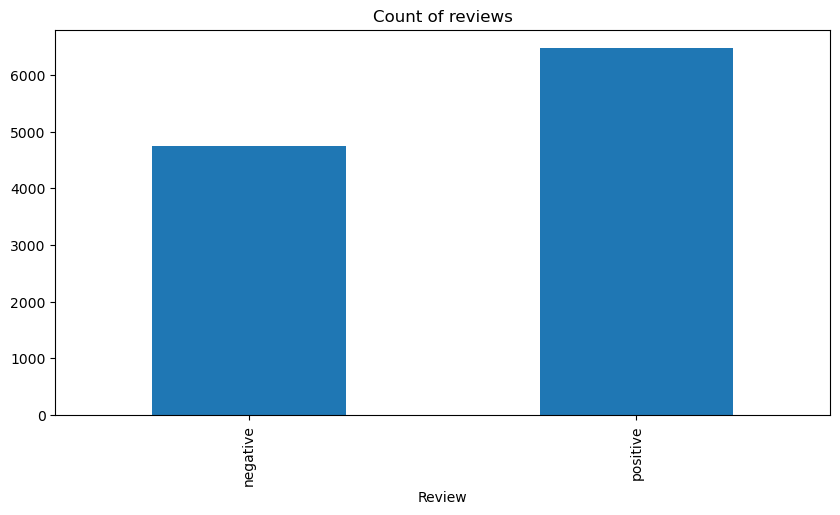

In [3]:
import matplotlib.pyplot as plt

ax = data['POSITIVE'].value_counts().sort_index()\
     .plot(kind='bar',
           title='Count of reviews',
           figsize=(10,5))
ax.set_xlabel('Review')
plt.show()

In [4]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
data['REVIEW_CLEAN'] = data['REVIEW_CLEAN'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer()

X = tfidf_vect.fit_transform(data['REVIEW_CLEAN'])
y = data['POSITIVE']
# Split data into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [6]:
# Naive Bayes
nb_clf = MultinomialNB().fit(X_train, y_train)

# SVM
svm_clf = SVC(kernel='linear').fit(X_train, y_train)

In [7]:
# Performance metrics comparison
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score  # Importing accuracy_score

# Naive Bayes
nb_predicted = nb_clf.predict(X_test)
nb_report = classification_report(y_test, nb_predicted)
# Calculate error rate for Naive Bayes
nb_error_rate = 1 - accuracy_score(y_test, nb_predicted)
nb_cm = confusion_matrix(y_test, nb_predicted)

# SVM
svm_predicted = svm_clf.predict(X_test)
svm_report = classification_report(y_test, svm_predicted)
# Calculate error rate for SVM
svm_error_rate = 1 - accuracy_score(y_test, svm_predicted)
svm_cm = confusion_matrix(y_test, svm_predicted)

In [8]:
nb_cm

array([[ 724,  471],
       [ 209, 1404]], dtype=int64)

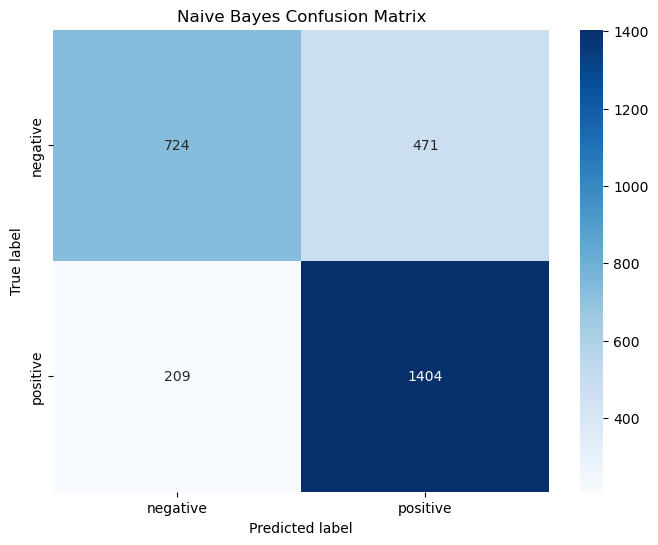

Naive Bayes Classifier Report:
              precision    recall  f1-score   support

    negative       0.78      0.61      0.68      1195
    positive       0.75      0.87      0.81      1613

    accuracy                           0.76      2808
   macro avg       0.76      0.74      0.74      2808
weighted avg       0.76      0.76      0.75      2808


Naive Bayes Error Rate: 0.24


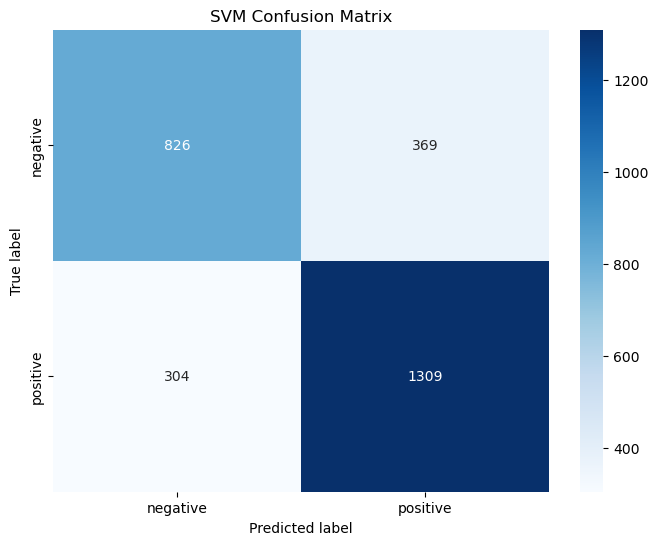


SVM Classifier Report:
              precision    recall  f1-score   support

    negative       0.73      0.69      0.71      1195
    positive       0.78      0.81      0.80      1613

    accuracy                           0.76      2808
   macro avg       0.76      0.75      0.75      2808
weighted avg       0.76      0.76      0.76      2808


SVM Error Rate: 0.24


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

# Plot confusion matrix for Naive Bayes
plot_confusion_matrix(nb_cm, classes=['negative', 'positive'], title='Naive Bayes Confusion Matrix')

print("Naive Bayes Classifier Report:")
print(nb_report)
print(f"\nNaive Bayes Error Rate: {nb_error_rate:.2f}")

# Plot confusion matrix for SVM
plot_confusion_matrix(svm_cm, classes=['negative', 'positive'], title='SVM Confusion Matrix')

print("\nSVM Classifier Report:")
print(svm_report)
print(f"\nSVM Error Rate: {svm_error_rate:.2f}")

# Final Visualization

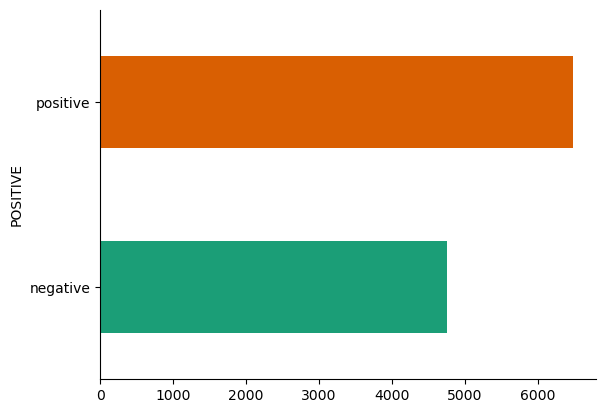

In [10]:
# positive true vs false

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('POSITIVE').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: xlabel='POSITIVE', ylabel='count'>

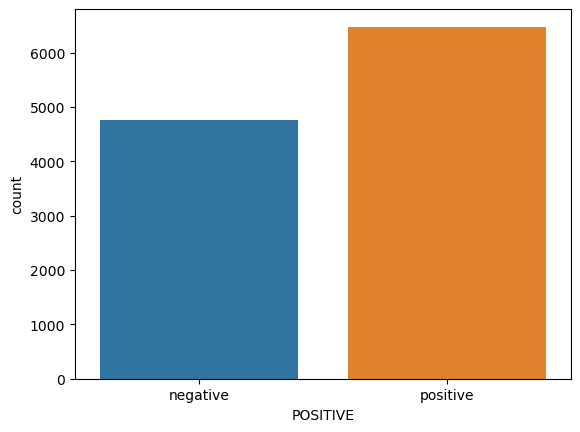

In [11]:
# postive review counts
sns.countplot(data=data, x='POSITIVE')

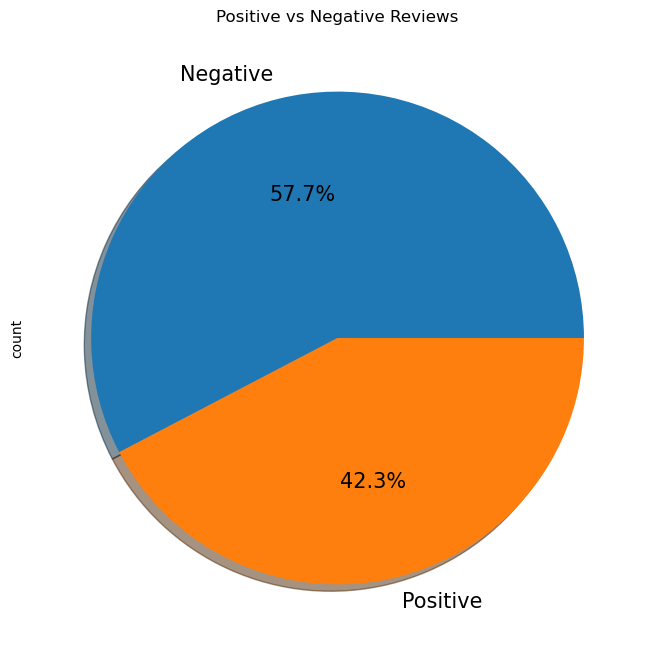

In [12]:
# Positive vs Negative Reviews Pie Chart

data['POSITIVE'].value_counts().plot(kind='pie', figsize=(8, 8), autopct='%1.1f%%', shadow=True, labels=['Negative', 'Positive'], textprops={'fontsize': 15})
plt.title('Positive vs Negative Reviews')
plt.show()


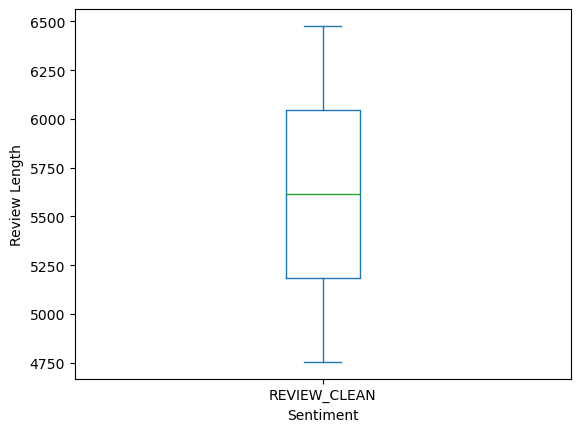

In [13]:
# Boxplot of review lengths by sentiment

data.groupby('POSITIVE')['REVIEW_CLEAN'].apply(len).plot(kind='box')
plt.xlabel('Sentiment')
plt.ylabel('Review Length')
plt.show()


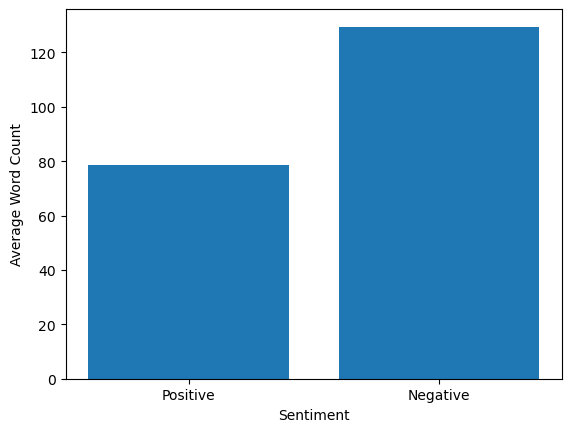

In [14]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Filter data for positive and negative sentiments
positive_reviews = data[data['POSITIVE'] == "positive"]['REVIEW_CLEAN']
negative_reviews = data[data['POSITIVE'] == "negative"]['REVIEW_CLEAN']

# Calculate average word count for positive reviews
avg_positive_word_count = sum(len(review) for review in positive_reviews) / len(positive_reviews)

# Calculate average word count for negative reviews
avg_negative_word_count = sum(len(review) for review in negative_reviews) / len(negative_reviews)

# Plot bar chart
plt.bar(['Positive', 'Negative'], [avg_positive_word_count, avg_negative_word_count])
plt.xlabel('Sentiment')
plt.ylabel('Average Word Count')
plt.show()



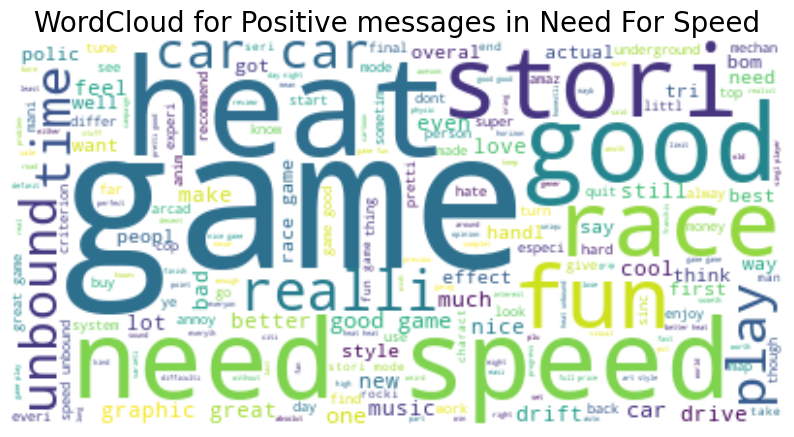

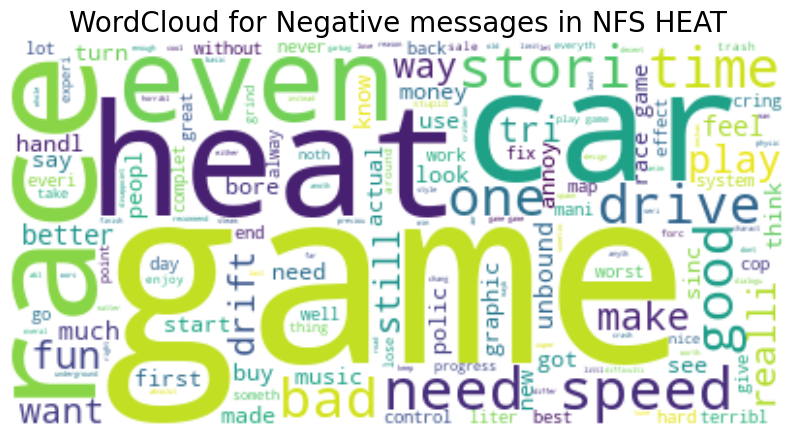

In [15]:
# Word cloud of the most frequent words in positive and negative reviews

import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Create a WordCloud object - positive
wc = WordCloud(
    background_color='white',
    max_words=200,
    contour_color='steelblue',  # Add contour color
    contour_width=2,  # Add contour width
)

if data['REVIEW_CLEAN'].apply(lambda x: isinstance(x, list)).any():
    data['REVIEW_CLEAN'] = data['REVIEW_CLEAN'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

# Generate the WordCloud using text data for HAM messages
positive_text = ' '.join(text for text in data.loc[data['POSITIVE'] == 'positive', 'REVIEW_CLEAN'].astype(str))
wc.generate(positive_text)

# Visualize the WordCloud
plt.figure(figsize=(10, 8))
plt.imshow(wc, interpolation='bilinear')
plt.title('WordCloud for Positive messages in Need For Speed', fontsize=20)
plt.axis('off')
plt.show()

import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Create a WordCloud object - negative
wc = WordCloud(
    background_color='white',
    max_words=200,
    contour_color='steelblue',  # Add contour color
    contour_width=2,  # Add contour width
)

if data['REVIEW_CLEAN'].apply(lambda x: isinstance(x, list)).any():
    data['REVIEW_CLEAN'] = data['REVIEW_CLEAN'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

# Generate the WordCloud using text data for HAM messages
negative_text = ' '.join(text for text in data.loc[data['POSITIVE'] == 'negative', 'REVIEW_CLEAN'].astype(str))
wc.generate(negative_text)

# Visualize the WordCloud
plt.figure(figsize=(10, 8))
plt.imshow(wc, interpolation='bilinear')
plt.title('WordCloud for Negative messages in NFS HEAT', fontsize=20)
plt.axis('off')
plt.show()


# TF-IDF

In [16]:
import math
from collections import Counter
import pandas as pd

# Create functions for calculating the tf, idf and tf-idf
def compute_tf1(document):
    # Split document into words
    words = document.split()
    word_count = Counter(words)
    tf = {word: count/len(words) for word, count in word_count.items()}
    return tf

def compute_idf1(documents):
    N = len(documents)
    idf = {}
    all_words = set(word for doc in documents for word in doc.split())
    for word in all_words:
        count = sum(1 for doc in documents if word in doc.split())
        idf[word] = math.log(N / count)
    return idf

def compute_tfidf1(document, idf):
    tfidf = {}
    tf = compute_tf1(document)
    for word, tf_value in tf.items():
        tfidf[word] = tf_value * idf[word]
    return tfidf

In [17]:
data_lemmatized1 = data['REVIEW_CLEAN']
# Compute the TF for each document
tf_data1 = [compute_tf1(doc) for doc in data_lemmatized1]


In [18]:
# Create DataFrame for TF
tf_df1 = pd.DataFrame(tf_data1).fillna(0)
print("TF df1 Scores:")
print(tf_df1)

TF df1 Scores:
            vol      best     updat      game      ever      play  properli  \
0      0.029412  0.029412  0.029412  0.058824  0.029412  0.029412  0.029412   
1      0.000000  0.000000  0.000000  0.666667  0.000000  0.000000  0.000000   
2      0.000000  0.000000  0.000000  0.142857  0.000000  0.142857  0.000000   
3      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4      0.000000  0.000000  0.000000  0.166667  0.000000  0.000000  0.000000   
...         ...       ...       ...       ...       ...       ...       ...   
11226  0.000000  0.000000  0.000000  0.166667  0.000000  0.000000  0.000000   
11227  0.000000  0.000000  0.000000  0.000000  0.000000  0.250000  0.000000   
11228  0.000000  0.000000  0.000000  0.055556  0.000000  0.000000  0.000000   
11229  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
11230  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

       speedomet       map    unplay

In [19]:
# Compute IDF
idf1 = compute_idf1(data_lemmatized1)
idf_df1 = pd.DataFrame([idf1]).fillna(0)
print("\nIDF df1 Scores:")
print(idf_df1)


IDF df1 Scores:
      award    lineal       gud       woo  manifest  brainless    worser  \
0  7.380523  9.326433  5.637554  9.326433  8.633286   9.326433  9.326433   

   derelict     flour   crazili  ...    puriti    summar    condit     whack  \
0  9.326433  8.633286  9.326433  ...  9.326433  7.716995  7.940139  8.633286   

        job      lean     grama    causal  sweatshop    concha  
0  5.356141  7.129209  9.326433  8.633286   9.326433  9.326433  

[1 rows x 6429 columns]


In [20]:
# Compute TF-IDF for each document
tfidf_data1 = [compute_tfidf1(doc, idf1) for doc in data_lemmatized1]

# Create DataFrame for TF-IDF
tfidf_df1 = pd.DataFrame(tfidf_data1).fillna(0)
print("TF-IDF df1 Scores:")
print(tfidf_df1)

TF-IDF df1 Scores:
           vol      best     updat      game      ever      play  properli  \
0      0.15245  0.089977  0.122739  0.054510  0.096443  0.064504  0.155914   
1      0.00000  0.000000  0.000000  0.617782  0.000000  0.000000  0.000000   
2      0.00000  0.000000  0.000000  0.132382  0.000000  0.313305  0.000000   
3      0.00000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4      0.00000  0.000000  0.000000  0.154445  0.000000  0.000000  0.000000   
...        ...       ...       ...       ...       ...       ...       ...   
11226  0.00000  0.000000  0.000000  0.154445  0.000000  0.000000  0.000000   
11227  0.00000  0.000000  0.000000  0.000000  0.000000  0.548284  0.000000   
11228  0.00000  0.000000  0.000000  0.051482  0.000000  0.000000  0.000000   
11229  0.00000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
11230  0.00000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

       speedomet       map    unplay  ...  v

# ----------------------------------------------------------------------------------------

## CSGO

# Text Preprocessing

In [21]:
import pandas as pd
import string
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
# Read CSV into DataFrame
data1 = pd.read_csv("hasil_review_1245620.csv")

# Define the function to remove punctuations from the text
def remove_punctuation(text):
    punctuation_free = "".join([char for char in text if char not in string.punctuation])
    return punctuation_free

# Apply the remove_punctuation function to the 'REVIEW' column
data1['REVIEW'] = data1['REVIEW'].apply(remove_punctuation)

# Convert text to lowercase
data1['REVIEW'] = data1['REVIEW'].str.lower()

# Define the function to remove digits and hyphens from the text
def remove_numbers(text):
    return re.sub(r"[\d-]", '', text)

# Apply the remove_numbers function to the 'REVIEW' column
data1['REVIEW'] = data1['REVIEW'].apply(remove_numbers)

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Tokenize the text
data1['REVIEW'] = data1['REVIEW'].apply(word_tokenize)

# Get the list of English stop words
stop_words = set(stopwords.words('english'))

# Define the function to remove stopwords from tokenized text
def remove_stopwords(text):
    return [word for word in text if word not in stop_words]

# Apply the remove_stopwords function to the 'REVIEW' column
data1['REVIEW'] = data1['REVIEW'].apply(remove_stopwords)

# Define the PorterStemmer object for stemming
porter_stemmer = PorterStemmer()

# Define the function for stemming
def stemming(text):
    return [porter_stemmer.stem(word) for word in text]

# Apply the stemming function to the 'REVIEW' column
data1['REVIEW'] = data1['REVIEW'].apply(stemming)

# Define the WordNetLemmatizer object for lemmatization
wordnet_lemmatizer = WordNetLemmatizer()

# Define the function for lemmatization
def lemmatizer(text):
    return [wordnet_lemmatizer.lemmatize(word) for word in text]

# Apply the lemmatizer function to the 'REVIEW' column
data1['REVIEW_CLEAN1'] = data1['REVIEW'].apply(lemmatizer)

# Save the cleaned dataset to a new CSV file
data1.to_csv('csgo.csv', index=False)

data1.head(20)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Qeme\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Qeme\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Qeme\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,INDEX,AUTHOR,DATE,POSITIVE,REVIEW,REVIEW_CLEAN1
0,166101424,7.656120e+16,26-05-24,True,"[best, dark, fantasi, still]","[best, dark, fantasi, still]"
1,166101313,7.656120e+16,26-05-24,True,[nice],[nice]
2,166101196,7.656120e+16,26-05-24,True,"[put, foolish, rest]","[put, foolish, rest]"
3,166100895,7.656120e+16,26-05-24,True,[peak],[peak]
4,166100622,7.656120e+16,26-05-24,False,"[small, error, said, save, data, corrupt, caus...","[small, error, said, save, data, corrupt, caus..."
5,166100428,7.656120e+16,26-05-24,True,"[yeah, epic]","[yeah, epic]"
6,166100073,7.656120e+16,26-05-24,True,"[got, genr, recent, veteran, like, much, easie...","[got, genr, recent, veteran, like, much, easie..."
7,166099471,7.656120e+16,26-05-24,True,[perfect],[perfect]
8,166099062,7.656120e+16,26-05-24,True,"[game, game]","[game, game]"
9,166098688,7.656120e+16,26-05-24,False,"[one, best]","[one, best]"


In [22]:
data1['POSITIVE'] = data1['POSITIVE'].replace({True: 'positive', False: 'negative'})
data1.head(20)

,INDEX,AUTHOR,DATE,POSITIVE,REVIEW,REVIEW_CLEAN1
0,166101424,7.656120e+16,26-05-24,positive,"[best, dark, fantasi, still]","[best, dark, fantasi, still]"
1,166101313,7.656120e+16,26-05-24,positive,[nice],[nice]
2,166101196,7.656120e+16,26-05-24,positive,"[put, foolish, rest]","[put, foolish, rest]"
3,166100895,7.656120e+16,26-05-24,positive,[peak],[peak]
4,166100622,7.656120e+16,26-05-24,negative,"[small, error, said, save, data, corrupt, caus...","[small, error, said, save, data, corrupt, caus..."
5,166100428,7.656120e+16,26-05-24,positive,"[yeah, epic]","[yeah, epic]"
6,166100073,7.656120e+16,26-05-24,positive,"[got, genr, recent, veteran, like, much, easie...","[got, genr, recent, veteran, like, much, easie..."
7,166099471,7.656120e+16,26-05-24,positive,[perfect],[perfect]
8,166099062,7.656120e+16,26-05-24,positive,"[game, game]","[game, game]"
9,166098688,7.656120e+16,26-05-24,negative,"[one, best]","[one, best]"


# Modeling & Performance Evaluation

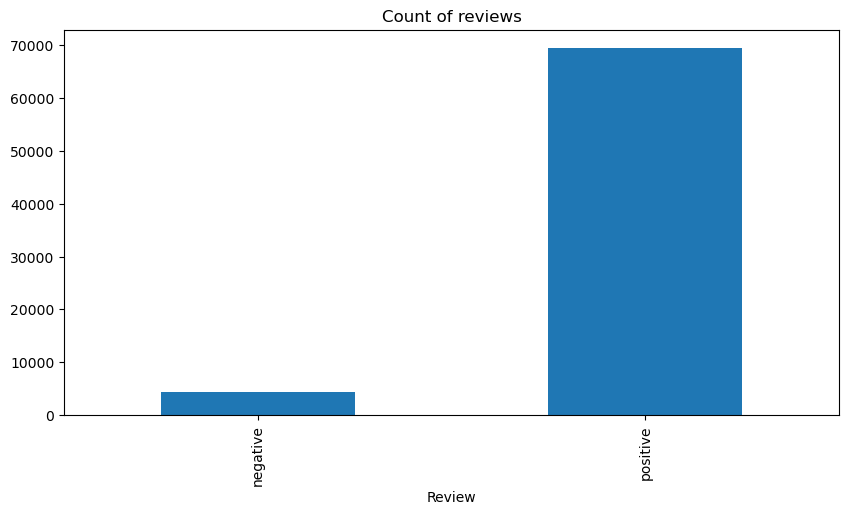

In [23]:
import matplotlib.pyplot as plt

ax = data1['POSITIVE'].value_counts().sort_index()\
     .plot(kind='bar',
           title='Count of reviews',
           figsize=(10,5))
ax.set_xlabel('Review')
plt.show()

In [24]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer()

X = tfidf_vect.fit_transform(data1['REVIEW_CLEAN1'].astype(str))
y = data1['POSITIVE']
# Split data into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [25]:
# Naive Bayes
nb_clf1 = MultinomialNB().fit(X_train, y_train)

# SVM
svm_clf1 = SVC(kernel='linear').fit(X_train, y_train)

In [26]:
# Performance metrics comparison
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score  # Importing accuracy_score

# Naive Bayes
nb_predicted1 = nb_clf1.predict(X_test)
nb_report1 = classification_report(y_test, nb_predicted1)
# Calculate error rate for Naive Bayes
nb_error_rate1 = 1 - accuracy_score(y_test, nb_predicted1)
nb_cm1 = confusion_matrix(y_test, nb_predicted1)

# SVM
svm_predicted1 = svm_clf1.predict(X_test)
svm_report1 = classification_report(y_test, svm_predicted1)
# Calculate error rate for SVM
svm_error_rate1 = 1 - accuracy_score(y_test, svm_predicted1)
svm_cm1 = confusion_matrix(y_test, svm_predicted1)

In [27]:
nb_cm1

array([[   43,   950],
       [   39, 17411]], dtype=int64)

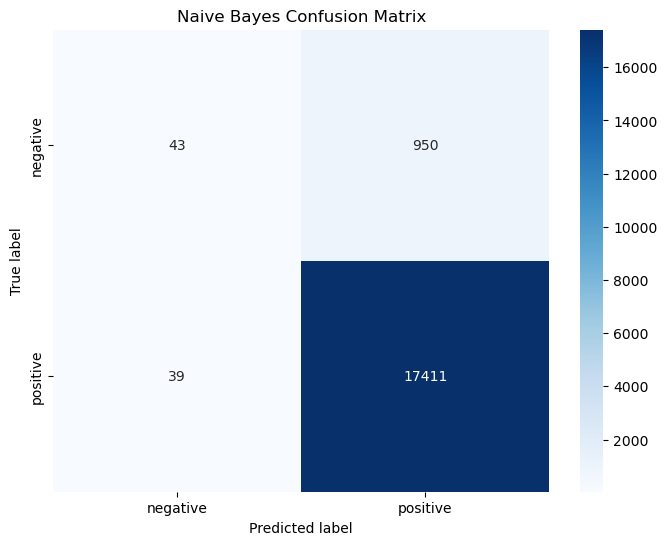

Naive Bayes Classifier Report:
              precision    recall  f1-score   support

    negative       0.52      0.04      0.08       993
    positive       0.95      1.00      0.97     17450

    accuracy                           0.95     18443
   macro avg       0.74      0.52      0.53     18443
weighted avg       0.93      0.95      0.92     18443


Naive Bayes Error Rate: 0.05


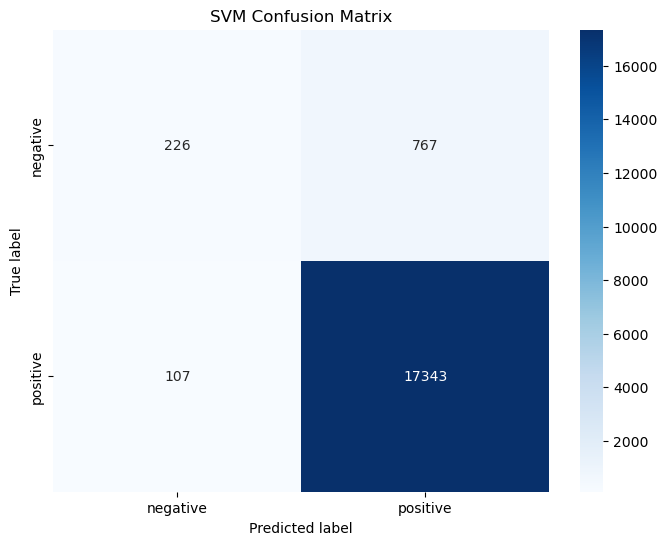


SVM Classifier Report:
              precision    recall  f1-score   support

    negative       0.68      0.23      0.34       993
    positive       0.96      0.99      0.98     17450

    accuracy                           0.95     18443
   macro avg       0.82      0.61      0.66     18443
weighted avg       0.94      0.95      0.94     18443


SVM Error Rate: 0.05


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(cm1, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm1, annot=True, fmt='d', cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

# Plot confusion matrix for Naive Bayes
plot_confusion_matrix(nb_cm1, classes=['negative', 'positive'], title='Naive Bayes Confusion Matrix')

print("Naive Bayes Classifier Report:")
print(nb_report1)
print(f"\nNaive Bayes Error Rate: {nb_error_rate1:.2f}")

# Plot confusion matrix for SVM
plot_confusion_matrix(svm_cm1, classes=['negative', 'positive'], title='SVM Confusion Matrix')

print("\nSVM Classifier Report:")
print(svm_report1)
print(f"\nSVM Error Rate: {svm_error_rate1:.2f}")

# Final Visualization

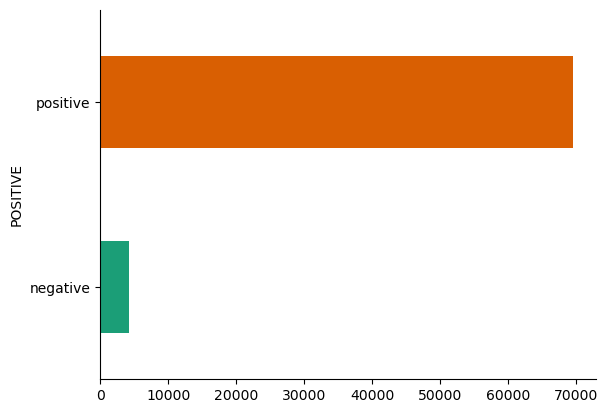

In [29]:
# positive true vs false

from matplotlib import pyplot as plt
import seaborn as sns
data1.groupby('POSITIVE').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: xlabel='POSITIVE', ylabel='count'>

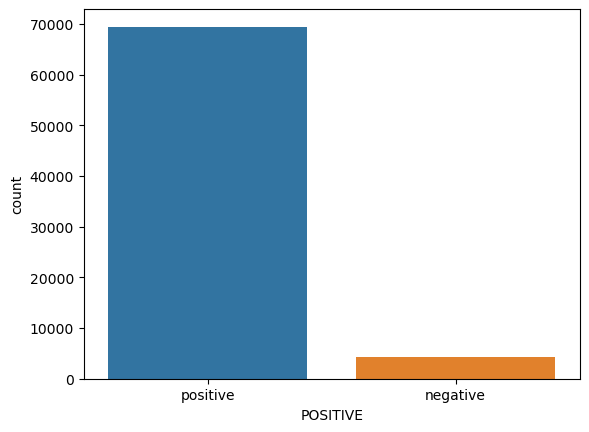

In [30]:
# postive review counts
sns.countplot(data=data1, x='POSITIVE')

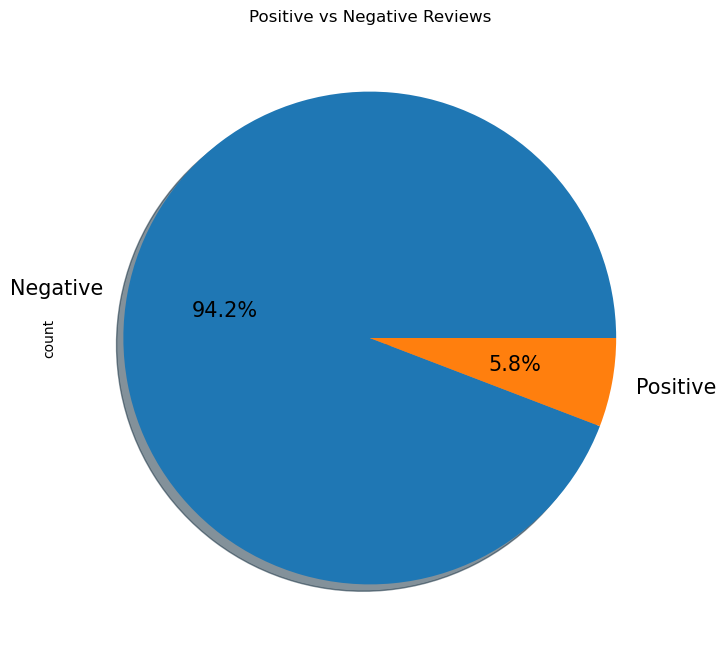

In [31]:
# Positive vs Negative Reviews Pie Chart

data1['POSITIVE'].value_counts().plot(kind='pie', figsize=(8, 8), autopct='%1.1f%%', shadow=True, labels=['Negative', 'Positive'], textprops={'fontsize': 15})
plt.title('Positive vs Negative Reviews')
plt.show()


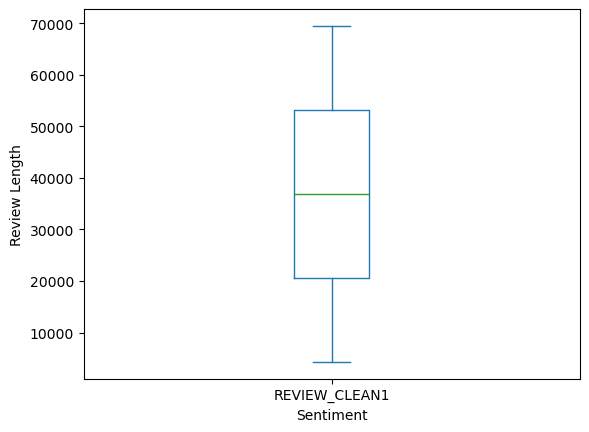

In [32]:
# Boxplot of review lengths by sentiment

data1.groupby('POSITIVE')['REVIEW_CLEAN1'].apply(len).plot(kind='box')
plt.xlabel('Sentiment')
plt.ylabel('Review Length')
plt.show()


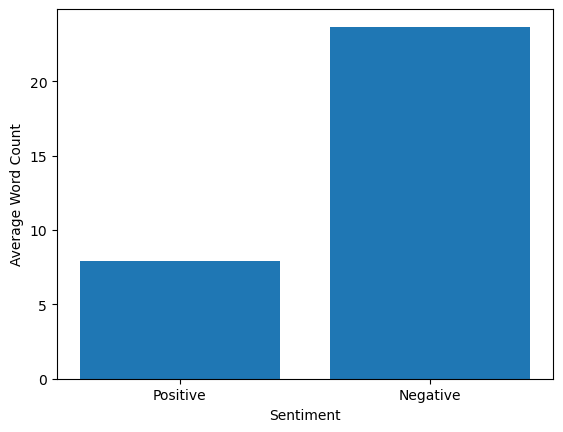

In [33]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Filter data for positive and negative sentiments
positive_reviews = data1[data1['POSITIVE'] == "positive"]['REVIEW_CLEAN1']
negative_reviews = data1[data1['POSITIVE'] == "negative"]['REVIEW_CLEAN1']

# Calculate average word count for positive reviews
avg_positive_word_count = sum(len(review) for review in positive_reviews) / len(positive_reviews)

# Calculate average word count for negative reviews
avg_negative_word_count = sum(len(review) for review in negative_reviews) / len(negative_reviews)

# Plot bar chart
plt.bar(['Positive', 'Negative'], [avg_positive_word_count, avg_negative_word_count])
plt.xlabel('Sentiment')
plt.ylabel('Average Word Count')
plt.show()


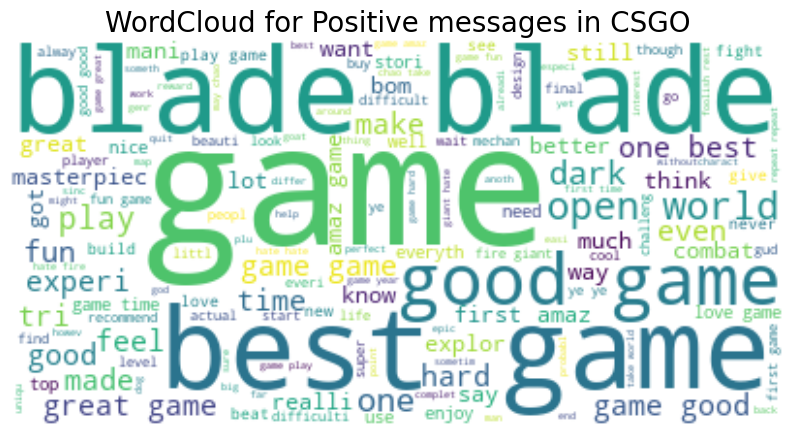

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Create a WordCloud object
wc = WordCloud(
    background_color='white', 
    max_words=200, 
    contour_color='steelblue',  # Add contour color
    contour_width=2,  # Add contour width
)

if data1['REVIEW_CLEAN1'].apply(lambda x: isinstance(x, list)).any():
    data1['REVIEW_CLEAN1'] = data1['REVIEW_CLEAN1'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)
    
# Generate the WordCloud using text data for positive messages
positive_text1 = ' '.join(text for text in data1.loc[data1['POSITIVE'] == 'positive', 'REVIEW_CLEAN1'].astype(str))
wc.generate(positive_text1)

# Visualize the WordCloud
plt.figure(figsize=(10, 8))
plt.imshow(wc, interpolation='bilinear')
plt.title('WordCloud for Positive messages in CSGO', fontsize=20)
plt.axis('off')
plt.show()



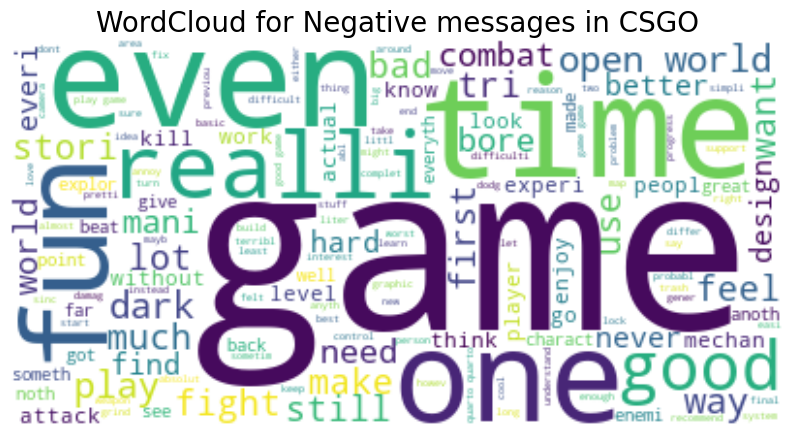

In [35]:
# Create a WordCloud object - negative
wc = WordCloud(
    background_color='white',
    max_words=200,
    contour_color='steelblue',  # Add contour color
    contour_width=2,  # Add contour width
)

if data1['REVIEW_CLEAN1'].apply(lambda x: isinstance(x, list)).any():
    data1['REVIEW_CLEAN1'] = data1['REVIEW_CLEAN1'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

# Generate the WordCloud using text data for HAM messages
positive_text1 = ' '.join(text for text in data1.loc[data1['POSITIVE'] == 'negative', 'REVIEW_CLEAN1'].astype(str))
wc.generate(positive_text1)

# Visualize the WordCloud
plt.figure(figsize=(10, 8))
plt.imshow(wc, interpolation='bilinear')
plt.title('WordCloud for Negative messages in CSGO', fontsize=20)
plt.axis('off')
plt.show()


# TF-IDF

In [36]:
import math
from collections import Counter

# Create functions for calculating the tf, idf and tf-idf
def compute_tf(document):
    # Split document into words
    words = document.split()
    word_count = Counter(words)
    tf = {word: count / len(words) for word, count in word_count.items()}
    return tf

def compute_idf(documents):
    N = len(documents)
    idf = {}
    all_words = set(word for doc in documents for word in doc.split())
    for word in all_words:
        count = sum(1 for doc in documents if word in doc.split())
        idf[word] = math.log(N / count)
    return idf

def compute_tfidf(document, idf):
    tfidf = {}
    tf = compute_tf(document)
    for word, tf_value in tf.items():
        tfidf[word] = tf_value * idf[word]
    return tfidf


In [37]:

data_lemmatized2 = data1['REVIEW_CLEAN1']
# Now compute the tf or the data that already lemmetised
tf_data2 = [compute_tf(doc) for doc in data_lemmatized2]


In [38]:
# Create DataFrame for TF
tf_df2 = pd.DataFrame(tf_data2).fillna(0)
print("TF df2 Scores:")
print(tf_df2)

TF df2 Scores:
       best  dark  fantasi     still  nice       put   foolish      rest  \
0      0.25  0.25     0.25  0.250000   0.0  0.000000  0.000000  0.000000   
1      0.00  0.00     0.00  0.000000   1.0  0.000000  0.000000  0.000000   
2      0.00  0.00     0.00  0.000000   0.0  0.333333  0.333333  0.333333   
3      0.00  0.00     0.00  0.000000   0.0  0.000000  0.000000  0.000000   
4      0.00  0.00     0.00  0.000000   0.0  0.000000  0.000000  0.000000   
...     ...   ...      ...       ...   ...       ...       ...       ...   
73766  0.00  0.00     0.00  0.000000   0.0  0.000000  0.000000  0.000000   
73767  0.00  0.00     0.00  0.000000   0.0  0.000000  0.000000  0.000000   
73768  0.00  0.00     0.00  0.083333   0.0  0.000000  0.000000  0.000000   
73769  0.00  0.00     0.00  0.000000   0.0  0.000000  0.000000  0.000000   
73770  0.00  0.00     0.00  0.000000   0.0  0.000000  0.000000  0.000000   

       peak     small  ...  potti  terrifyingli  nondescript  mischiev  

In [39]:
idf2 = compute_idf(data_lemmatized2)
idf_df2 = pd.DataFrame([idf2]).fillna(0)
print("\nIDF df2 Scores:")
print(idf_df2)


IDF df2 Scores:
      award    lineal       gud        jab        woo   captain   gaslight  \
0  7.276895  8.906136  4.169937  10.515574  11.208721  9.822427  10.110109   

   manifest  brainless   derelict  ...     whack    baptism     caress  \
0  9.599283  10.110109  11.208721  ...  9.599283  11.208721  11.208721   

        job      lean      grama     causal   gastriti    caramel    concha  
0  5.988365  8.436132  11.208721  10.110109  11.208721  10.515574  9.599283  

[1 rows x 10505 columns]


In [40]:
# Compute TF-IDF for each document
tfidf_data2 = [compute_tfidf(doc, idf2) for doc in data_lemmatized2]

# Create DataFrame for TF-IDF
tfidf_df2 = pd.DataFrame(tfidf_data2).fillna(0)
print("\nTF-IDF df2 Scores:")
print(tfidf_df2)


TF-IDF df2 Scores:
           best      dark   fantasi     still      nice       put  foolish  \
0      0.592687  0.766446  1.308093  0.864096  0.000000  0.000000  0.00000   
1      0.000000  0.000000  0.000000  0.000000  3.968071  0.000000  0.00000   
2      0.000000  0.000000  0.000000  0.000000  0.000000  1.521644  2.15171   
3      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.00000   
4      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.00000   
...         ...       ...       ...       ...       ...       ...      ...   
73766  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.00000   
73767  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.00000   
73768  0.000000  0.000000  0.000000  0.288032  0.000000  0.000000  0.00000   
73769  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.00000   
73770  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.00000   

           rest      peak     small  ...  p

# ----------------------------------------------------------------------------------------

## Helldivers 2

# Text Preprocessing

In [41]:
# Import necessary modules
import pandas as pd
import string
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
# Read CSV into DataFrame
data2 = pd.read_csv("hasil_review_553850.csv", nrows = 100000)

data2 = data2.dropna(subset=['REVIEW'])

# Define the function to remove punctuations from the text
def remove_punctuation(text):
    punctuation_free = "".join([char for char in text if char not in string.punctuation])
    return punctuation_free

# Apply the remove_punctuation function to the 'REVIEW' column
data2['REVIEW'] = data2['REVIEW'].apply(remove_punctuation)

# Convert text to lowercase
data2['REVIEW'] = data2['REVIEW'].str.lower()

# Define the function to remove digits and hyphens from the text
def remove_numbers(text):
    return re.sub(r"[\d-]", '', text)

# Apply the remove_numbers function to the 'REVIEW' column
data2['REVIEW'] = data2['REVIEW'].apply(remove_numbers)

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Tokenize the text
data2['REVIEW'] = data2['REVIEW'].apply(word_tokenize)

# Get the list of English stop words
stop_words = set(stopwords.words('english'))

# Define the function to remove stopwords from tokenized text
def remove_stopwords(text):
    return [word for word in text if word not in stop_words]

# Apply the remove_stopwords function to the 'REVIEW' column
data2['REVIEW'] = data2['REVIEW'].apply(remove_stopwords)

# Define the PorterStemmer object for stemming
porter_stemmer = PorterStemmer()

# Define the function for stemming
def stemming(text):
    return [porter_stemmer.stem(word) for word in text]

# Apply the stemming function to the 'REVIEW' column
data2['REVIEW'] = data2['REVIEW'].apply(stemming)

# Define the WordNetLemmatizer object for lemmatization
wordnet_lemmatizer = WordNetLemmatizer()

# Define the function for lemmatization
def lemmatizer(text):
    return [wordnet_lemmatizer.lemmatize(word) for word in text]

# Apply the lemmatizer function to the 'REVIEW' column
data2['REVIEW_CLEAN2'] = data2['REVIEW'].apply(lemmatizer)

# Save the cleaned dataset to a new CSV file
data2.to_csv('helldivers2.csv', index=False)

data2.head(20)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Qeme\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Qeme\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Qeme\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,INDEX,AUTHOR,DATE,POSITIVE,REVIEW,REVIEW_CLEAN2
0,166105417,76561198041903522,26/05/2024,True,"[game, good, great, fun, satir, play, station,...","[game, good, great, fun, satir, play, station,..."
1,166105377,76561198244372940,26/05/2024,True,"[sometim, real, accident, shoot, along, way]","[sometim, real, accident, shoot, along, way]"
2,166105343,76561198175697815,26/05/2024,True,"[noth, ever, made, patriot]","[noth, ever, made, patriot]"
3,166105080,76561199181733767,26/05/2024,True,"[doom, music]","[doom, music]"
4,166104792,76561197989657136,26/05/2024,True,[democraci],[democraci]
5,166104493,76561198257071705,26/05/2024,False,[good],[good]
6,166104489,76561198401701024,26/05/2024,False,"[love, game, constant, game, break, sad]","[love, game, constant, game, break, sad]"
7,166104430,76561197972174487,26/05/2024,True,"[well, made, game, super, fun]","[well, made, game, super, fun]"
8,166104135,76561198140336314,26/05/2024,True,"[game, awesom, final, stop, mourn, evolv, move]","[game, awesom, final, stop, mourn, evolv, move]"
9,166104066,76561199690825584,26/05/2024,True,"[super, earth, freedom]","[super, earth, freedom]"


In [42]:
data2['POSITIVE'] = data2['POSITIVE'].replace({True: 'positive', False: 'negative'})
data2.head(20)

,INDEX,AUTHOR,DATE,POSITIVE,REVIEW,REVIEW_CLEAN2
0,166105417,76561198041903522,26/05/2024,positive,"[game, good, great, fun, satir, play, station,...","[game, good, great, fun, satir, play, station,..."
1,166105377,76561198244372940,26/05/2024,positive,"[sometim, real, accident, shoot, along, way]","[sometim, real, accident, shoot, along, way]"
2,166105343,76561198175697815,26/05/2024,positive,"[noth, ever, made, patriot]","[noth, ever, made, patriot]"
3,166105080,76561199181733767,26/05/2024,positive,"[doom, music]","[doom, music]"
4,166104792,76561197989657136,26/05/2024,positive,[democraci],[democraci]
5,166104493,76561198257071705,26/05/2024,negative,[good],[good]
6,166104489,76561198401701024,26/05/2024,negative,"[love, game, constant, game, break, sad]","[love, game, constant, game, break, sad]"
7,166104430,76561197972174487,26/05/2024,positive,"[well, made, game, super, fun]","[well, made, game, super, fun]"
8,166104135,76561198140336314,26/05/2024,positive,"[game, awesom, final, stop, mourn, evolv, move]","[game, awesom, final, stop, mourn, evolv, move]"
9,166104066,76561199690825584,26/05/2024,positive,"[super, earth, freedom]","[super, earth, freedom]"


# Modeling & Performance Evaluation

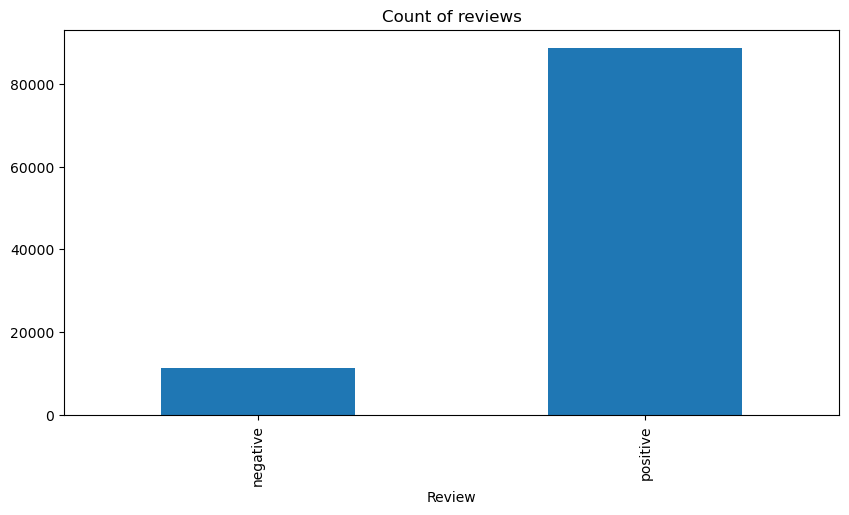

In [43]:
import matplotlib.pyplot as plt

ax = data2['POSITIVE'].value_counts().sort_index()\
     .plot(kind='bar',
           title='Count of reviews',
           figsize=(10,5))
ax.set_xlabel('Review')
plt.show()

In [44]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer()

X = tfidf_vect.fit_transform(data2['REVIEW_CLEAN2'].astype(str))
y = data2['POSITIVE']
# Split data into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [45]:
# Naive Bayes
nb_clf2 = MultinomialNB().fit(X_train, y_train)

# SVM
svm_clf2 = SVC(kernel='linear').fit(X_train, y_train)


In [46]:
# Performance metrics comparison
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score  # Importing accuracy_score

# Naive Bayes
nb_predicted2 = nb_clf2.predict(X_test)
nb_report2 = classification_report(y_test, nb_predicted2)
# Calculate error rate for Naive Bayes
nb_error_rate2 = 1 - accuracy_score(y_test, nb_predicted2)
nb_cm2 = confusion_matrix(y_test, nb_predicted2)

# SVM
svm_predicted2 = svm_clf2.predict(X_test)
svm_report2 = classification_report(y_test, svm_predicted2)
# Calculate error rate for SVM
svm_error_rate2 = 1 - accuracy_score(y_test, svm_predicted2)
svm_cm2 = confusion_matrix(y_test, svm_predicted2)

In [47]:
nb_cm2

array([[  852,  1990],
       [   96, 22062]], dtype=int64)

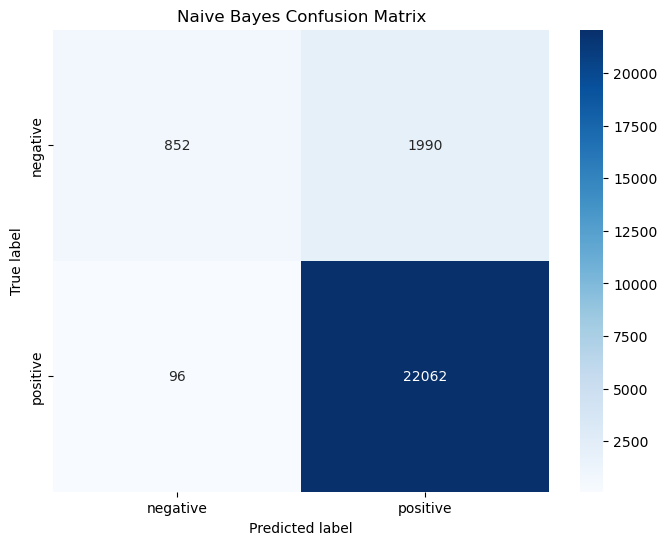

Naive Bayes Classifier Report:
              precision    recall  f1-score   support

    negative       0.90      0.30      0.45      2842
    positive       0.92      1.00      0.95     22158

    accuracy                           0.92     25000
   macro avg       0.91      0.65      0.70     25000
weighted avg       0.92      0.92      0.90     25000


Naive Bayes Error Rate: 0.08


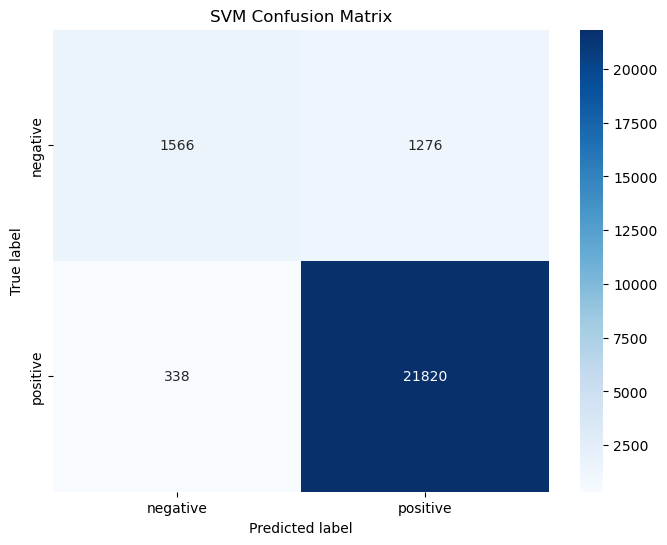


SVM Classifier Report:
              precision    recall  f1-score   support

    negative       0.82      0.55      0.66      2842
    positive       0.94      0.98      0.96     22158

    accuracy                           0.94     25000
   macro avg       0.88      0.77      0.81     25000
weighted avg       0.93      0.94      0.93     25000


SVM Error Rate: 0.06


In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(cm2, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm2, annot=True, fmt='d', cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

# Plot confusion matrix for Naive Bayes
plot_confusion_matrix(nb_cm2, classes=['negative', 'positive'], title='Naive Bayes Confusion Matrix')

print("Naive Bayes Classifier Report:")
print(nb_report2)
print(f"\nNaive Bayes Error Rate: {nb_error_rate2:.2f}")

# Plot confusion matrix for SVM
plot_confusion_matrix(svm_cm2, classes=['negative', 'positive'], title='SVM Confusion Matrix')

print("\nSVM Classifier Report:")
print(svm_report2)
print(f"\nSVM Error Rate: {svm_error_rate2:.2f}")



# Final Visualization

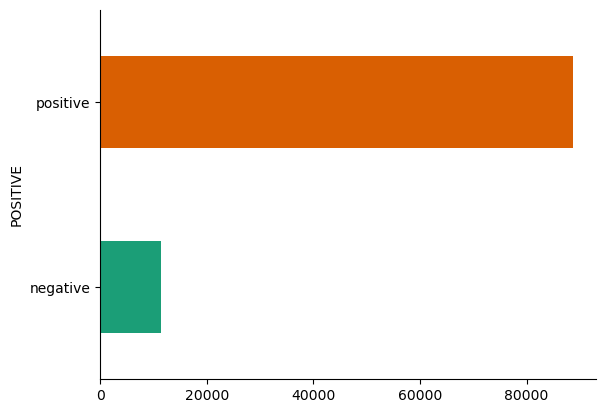

In [49]:
# positive true vs false

from matplotlib import pyplot as plt
import seaborn as sns
data2.groupby('POSITIVE').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)


<Axes: xlabel='POSITIVE', ylabel='count'>

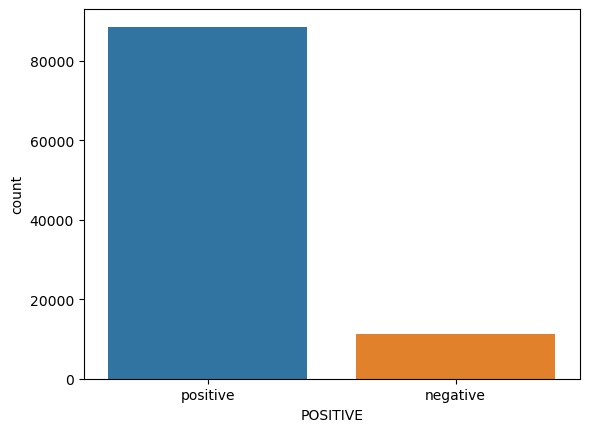

In [50]:
# postive review counts
sns.countplot(data=data2, x='POSITIVE')

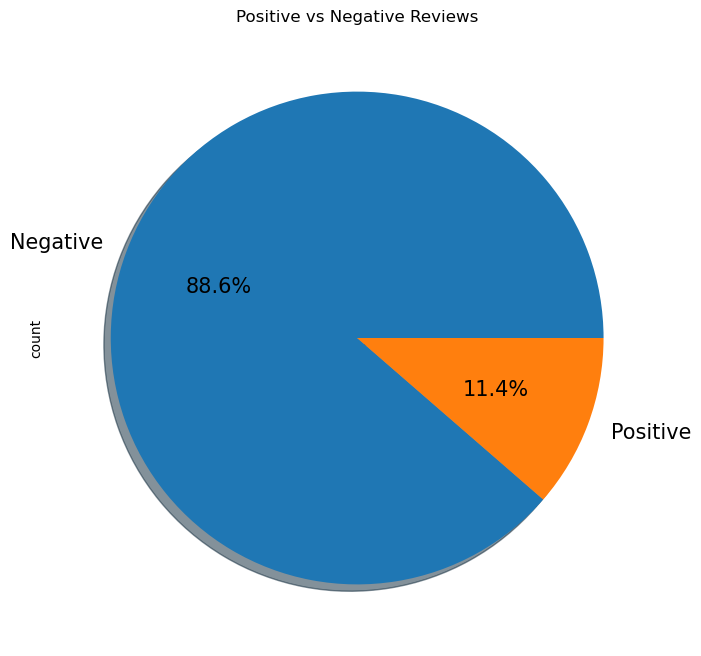

In [51]:
# Positive vs Negative Reviews Pie Chart

data2['POSITIVE'].value_counts().plot(kind='pie', figsize=(8, 8), autopct='%1.1f%%', shadow=True, labels=['Negative', 'Positive'], textprops={'fontsize': 15})
plt.title('Positive vs Negative Reviews')
plt.show()


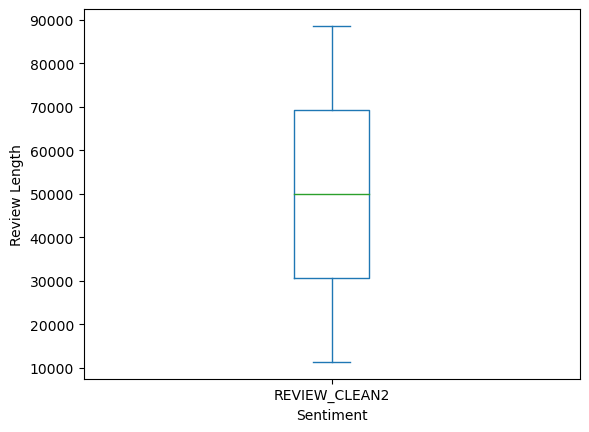

In [52]:
# Boxplot of review lengths by sentiment

data2.groupby('POSITIVE')['REVIEW_CLEAN2'].apply(len).plot(kind='box')
plt.xlabel('Sentiment')
plt.ylabel('Review Length')
plt.show()


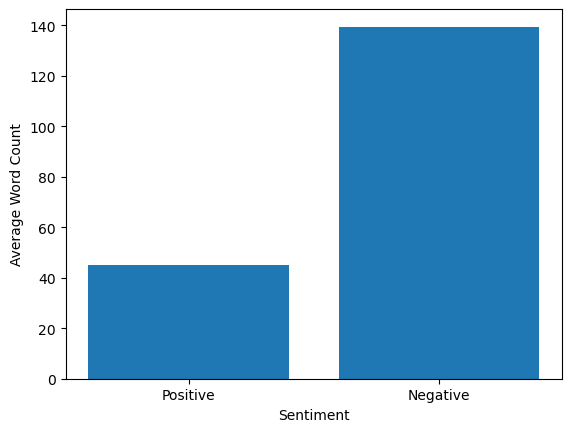

,INDEX,AUTHOR,DATE,POSITIVE,REVIEW,REVIEW_CLEAN2
0,166105417,76561198041903522,26/05/2024,positive,"[game, good, great, fun, satir, play, station,...","[game, good, great, fun, satir, play, station,..."
1,166105377,76561198244372940,26/05/2024,positive,"[sometim, real, accident, shoot, along, way]","[sometim, real, accident, shoot, along, way]"
2,166105343,76561198175697815,26/05/2024,positive,"[noth, ever, made, patriot]","[noth, ever, made, patriot]"
3,166105080,76561199181733767,26/05/2024,positive,"[doom, music]","[doom, music]"
4,166104792,76561197989657136,26/05/2024,positive,[democraci],[democraci]


In [53]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Filter data for positive and negative sentiments
positive_reviews = data1[data1['POSITIVE'] == "positive"]['REVIEW_CLEAN1']
negative_reviews = data1[data1['POSITIVE'] == "negative"]['REVIEW_CLEAN1']

# Calculate average word count for positive reviews
avg_positive_word_count = sum(len(review) for review in positive_reviews) / len(positive_reviews)

# Calculate average word count for negative reviews
avg_negative_word_count = sum(len(review) for review in negative_reviews) / len(negative_reviews)

# Plot bar chart
plt.bar(['Positive', 'Negative'], [avg_positive_word_count, avg_negative_word_count])
plt.xlabel('Sentiment')
plt.ylabel('Average Word Count')
plt.show()


data2.head()



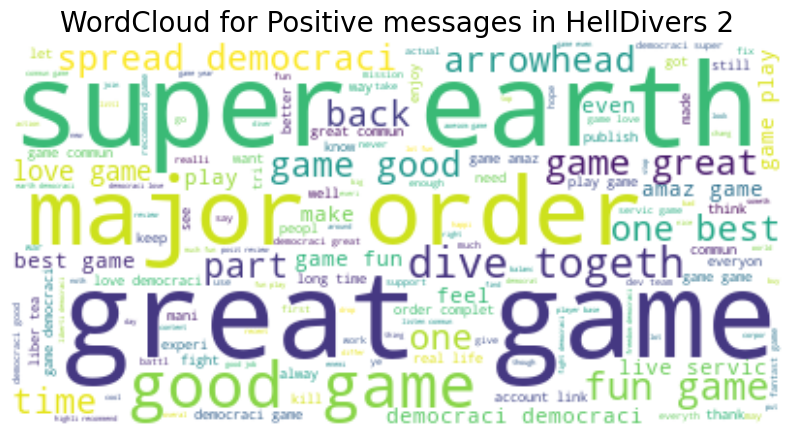

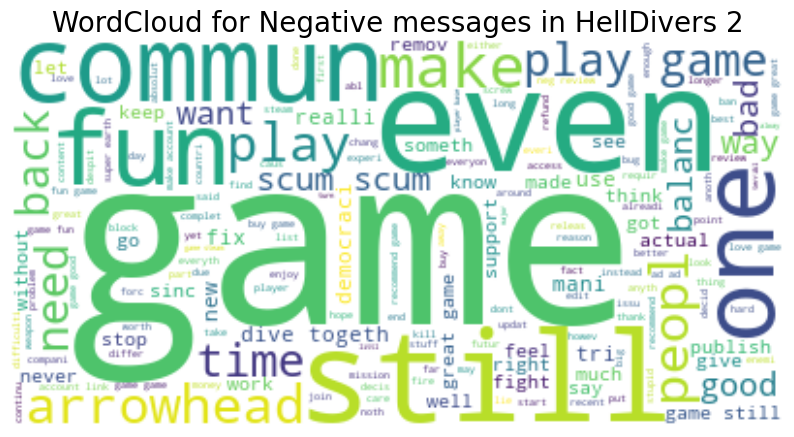

In [54]:
# prompt: Word cloud of the most frequent words in positive and negative reviews

# Create a WordCloud object - positive
wc = WordCloud(
    background_color='white',
    max_words=200,
    contour_color='steelblue',  # Add contour color
    contour_width=2,  # Add contour width
)

if data2['REVIEW_CLEAN2'].apply(lambda x: isinstance(x, list)).any():
    data2['REVIEW_CLEAN2'] = data2['REVIEW_CLEAN2'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

# Generate the WordCloud using text data for HAM messages
positive_text = ' '.join(text for text in data2.loc[data2['POSITIVE'] == 'positive', 'REVIEW_CLEAN2'].astype(str))
wc.generate(positive_text)

# Visualize the WordCloud
plt.figure(figsize=(10, 8))
plt.imshow(wc, interpolation='bilinear')
plt.title('WordCloud for Positive messages in HellDivers 2', fontsize=20)
plt.axis('off')
plt.show()

# Create a WordCloud object - negative
wc = WordCloud(
    background_color='white',
    max_words=200,
    contour_color='steelblue',  # Add contour color
    contour_width=2,  # Add contour width
)

if data2['REVIEW_CLEAN2'].apply(lambda x: isinstance(x, list)).any():
    data2['REVIEW_CLEAN2'] = data2['REVIEW_CLEAN2'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

# Generate the WordCloud using text data for HAM messages
positive_text1 = ' '.join(text for text in data2.loc[data2['POSITIVE'] == 'negative', 'REVIEW_CLEAN2'].astype(str))
wc.generate(positive_text1)

# Visualize the WordCloud
plt.figure(figsize=(10, 8))
plt.imshow(wc, interpolation='bilinear')
plt.title('WordCloud for Negative messages in HellDivers 2', fontsize=20)
plt.axis('off')
plt.show()


# TFIDF

In [55]:
# Create functions for calculating the tf, idf and tf-idf
def compute_tf(document):
    word_count = Counter(document)
    tf = {word: count / len(document) for word, count in word_count.items()}
    return tf

def compute_idf(documents):
    N = len(documents)
    idf = {}
    all_words = set(word for doc in documents for word in doc)
    for word in all_words:
        count = sum(1 for doc in documents if word in doc)
        idf[word] = math.log(N / count)
    return idf

def compute_tfidf(document, idf):
    tfidf = {}
    tf = compute_tf(document)
    for word, tf_value in tf.items():
        tfidf[word] = tf_value * idf[word]
    return tfidf

In [56]:
data2['REVIEW_CLEAN2'] = data2['REVIEW_CLEAN2'].apply(lambda x: x.split())
data_lemmatized3 = data2['REVIEW_CLEAN2']
# Now compute the tf or the data that already lemmetised
tf_data3 = [compute_tf(doc) for doc in data_lemmatized3]


In [69]:
# Create DataFrame for TF
tf_df3 = pd.DataFrame(tf_data3[:10000]).fillna(0)
print("TF df3 Scores:")
print(tf_df3)

TF df3 Scores:
          game      good     great       fun     satir      play   station  \
0     0.111111  0.111111  0.111111  0.111111  0.111111  0.111111  0.111111   
1     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
...        ...       ...       ...       ...       ...       ...       ...   
9995  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
9996  0.062500  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
9997  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
9998  0.500000  0.500000  0.000000  0.000000  0.000000  0.000000  0.000000   
9999  0.333333  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

       authent       bad   sometim  ...  cowardi

In [70]:
idf3 = compute_idf(data_lemmatized3)
idf_df3 = pd.DataFrame([idf3]).fillna(0)
print("\nIDF df3 Scores:")
print(idf_df3)


IDF df3 Scores:
      award       gud       woo        jab      trass   captain  gaslight  \
0  8.679702  5.675185  8.947966  10.126621  11.512915  8.377421  9.028009   

   manifest  brainless     operat  ...     whack     caress  egalitarian  \
0   6.32553   9.315691  11.512915  ...  9.028009  11.512915    11.512915   

        job      lean     causal   malarkey  sweatshop     concha      spirt  
0  4.373255  8.804865  10.126621  10.414303  11.512915  11.512915  11.512915  

[1 rows x 10236 columns]


In [72]:
# Compute TF-IDF for each document
tfidf_data3 = [compute_tfidf(doc, idf3) for doc in data_lemmatized3]

# Create DataFrame for TF-IDF
tfidf_df3 = pd.DataFrame(tfidf_data3[:10000]).fillna(0)
print("\nTF-IDF df3 Scores:")
print(tfidf_df3)


TF-IDF df3 Scores:
          game      good     great       fun    satir      play   station  \
0     0.097009  0.235039  0.237791  0.227652  0.61978  0.286335  0.768644   
1     0.000000  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000   
2     0.000000  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000   
3     0.000000  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000   
4     0.000000  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000   
...        ...       ...       ...       ...      ...       ...       ...   
9995  0.000000  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000   
9996  0.054567  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000   
9997  0.000000  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000   
9998  0.436539  1.057674  0.000000  0.000000  0.00000  0.000000  0.000000   
9999  0.291026  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000   

       authent       bad   sometim  ...  cowardic  bald